In [215]:
import numpy as np 

#load data 
data = np.load("proyecto_training_data.npy")
#find 80% value

#get total rows numbers
rowscount,columscount = data.shape

trainrows = int((80 * rowscount) / 100) 


train = data[0:trainrows]

test = data[trainrows:]





#caluculate median,max,mim,range,standar desviation  of all colums 

median  = np.nanmedian(data,0)
maxi    = np.nanmax(data,0)
mini    = np.nanmin(data,0)
peak    = np.ptp(data,0)
ds      = np.nanstd(data,0)

print ("MEDIAN")
print(median)
print("MAX")
print(maxi)
print("MIN")
print(mini)
print("PEAKtoPEAK")
print(peak)
print("STANDARD DESVIATION")
print(ds)


MEDIAN
[1.630e+05 6.000e+00 1.087e+03 6.000e+00 1.973e+03 6.900e+01]
MAX
[7.550e+05 1.000e+01 4.692e+03 1.400e+01 2.010e+03 3.130e+02]
MIN
[3.490e+04 1.000e+00 3.340e+02 2.000e+00 1.872e+03 2.100e+01]
PEAKtoPEAK
[7.201e+05 9.000e+00 4.358e+03 1.200e+01 1.380e+02       nan]
STANDARD DESVIATION
[7.94152919e+04 1.38252284e+00 3.86455322e+02 1.62483655e+00
 3.01925588e+01 2.42746394e+01]


Text(0.5, 1.0, 'Precio')

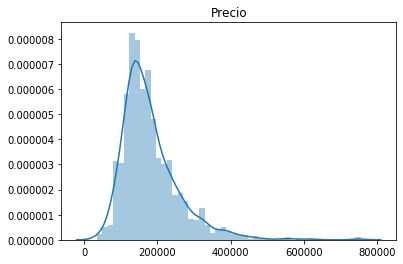

In [281]:
import seaborn as sns
sns.distplot(data[:,0]).set_title('Precio')


Text(0.5, 1.0, 'OverallQual')

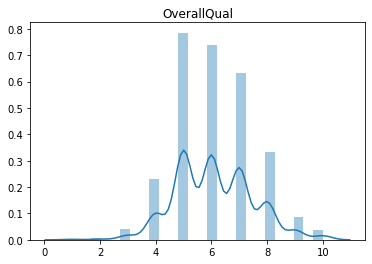

In [282]:
sns.distplot(data[:,1]).set_title('OverallQual')

Text(0.5, 1.0, '1stFlrSF')

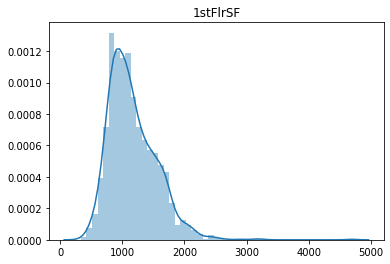

In [283]:
sns.distplot(data[:,2]).set_title('1stFlrSF')

Text(0.5, 1.0, 'TotRmsAbvGrd')

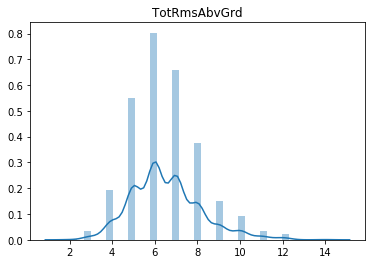

In [284]:
sns.distplot(data[:,3]).set_title('TotRmsAbvGrd')

Text(0.5, 1.0, 'YearBuilt')

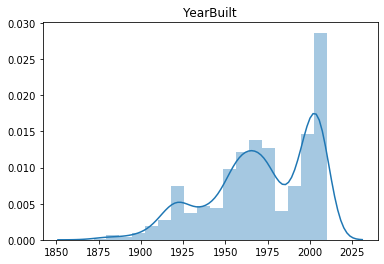

In [285]:
sns.distplot(data[:,4]).set_title('YearBuilt')

Text(0.5, 1.0, 'LotFrontage')

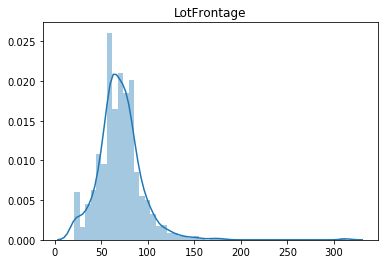

In [287]:
sns.distplot(data[:,5]).set_title('LotFrontage')

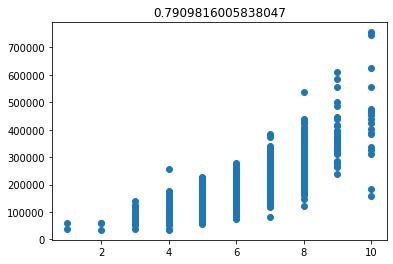

In [222]:
import matplotlib.pyplot as plt
x = data[:,1]
y=  data[:,0]
plt.scatter(x,y)
plt.title(np.corrcoef(x, y)[0][1])
plt.show()

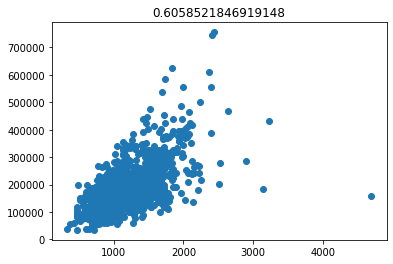

In [223]:
x = data[:,2]
plt.scatter(x,y)
plt.title(np.corrcoef(x, y)[0][1])
plt.show()

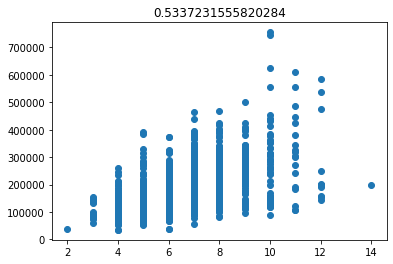

In [224]:
x = data[:,3]
plt.scatter(x,y)
plt.title(np.corrcoef(x, y)[0][1])
plt.show()

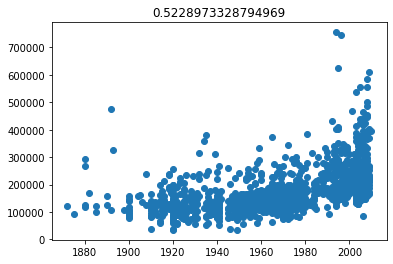

In [225]:
x = data[:,4]
plt.scatter(x,y)
plt.title(np.corrcoef(x, y)[0][1])
plt.show()

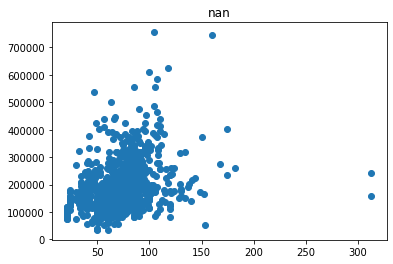

In [291]:
x = data[:,5]
plt.scatter(x,y)
plt.title(np.corrcoef(x, y)[0][1])
plt.show()

In [227]:
def trainprocess(x,y,epochs,PrintEach,lr):
    
    errores = []
    modelo  = []
    
    #create x,1 
    nx = np.array(x)
    rc= nx.shape
    o = np.ones(rc)
    xh = np.column_stack((nx,o))
    
    
    
    #initial values of m b 
    m= 0
    b= 0
    
    j=1
    
    for i in range(0,epochs):
        #find Yhat
        Yhat = np.dot(xh,[m,b])
       
        error =np.mean( (y-Yhat) **2) /2
        
        gradiente = np.mean(np.multiply(np.subtract(Yhat,y)[:,None],xh),axis=0)
        m = m - (lr * gradiente[0])
        b = b - (lr * gradiente[1])
        
        errores.append(error)
        modelo.append([m,b])
        
        if (j == PrintEach):
            j= 0 
            print("epoch :" + str(i+1) + " error : " + str(error))
            
        j += 1

    return (errores,modelo)
    


In [228]:
def GraficaError(error,ax):
    
    #plt.plot(error)
     ax.plot(error)
    
    #plt.show()








In [292]:
def GraficaEntreno(x,y,restulado,n,ax1):


        
    m = restulado[len(restulado)-1][0]
    b = restulado[len(restulado)-1][1]


    

    f = m*x+b
    ax1.plot(x, f, '-b', label='y=2x+1')
    
   

    ax1.scatter(x[::n],y[::n],color='red')

    

epoch :10000 error : 1146965478.7557297
epoch :20000 error : 1146916229.240064
epoch :30000 error : 1146916219.4603114
epoch :40000 error : 1146916219.4583695
epoch :50000 error : 1146916219.458369
epoch :60000 error : 1146916219.458369
epoch :70000 error : 1146916219.4583695
epoch :80000 error : 1146916219.4583695
epoch :90000 error : 1146916219.4583695
epoch :100000 error : 1146916219.4583695


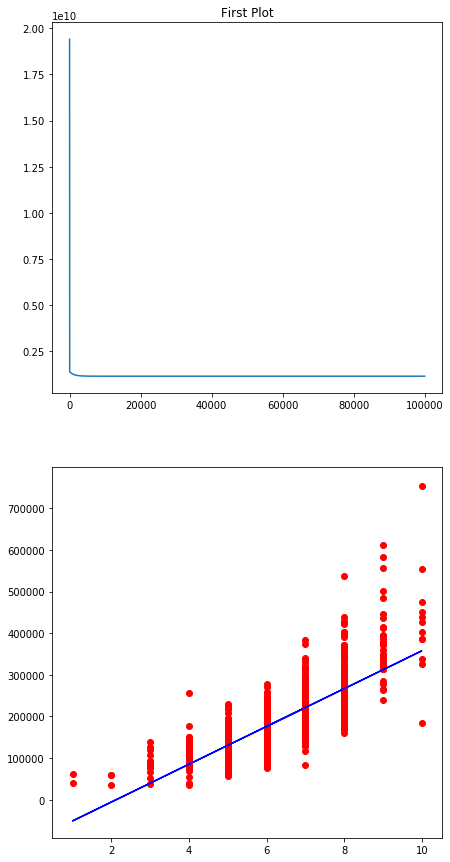

In [293]:
trainy =  train[:,0]
trainx1 = train[:,1]
trainx2=  train[:,2]


lrx1 = 0.009
epochs = 100000 

#lrx1 = 0.0001
#epochs = 100  para generar un error mas grande que Sickit Learn



ex1,cx1 = trainprocess (trainx1 ,trainy,epochs,10000,lrx1)



fig, (ax,ax2) = plt.subplots(2,1,figsize=(7,15))
#create_subplot(data, ax1)
ax.title.set_text('Error')
ax2.title.set_text('OverallQual')

GraficaError(ex1,ax)
GraficaEntreno(trainx1 ,trainy,cx1,1,ax2)

plt.show()



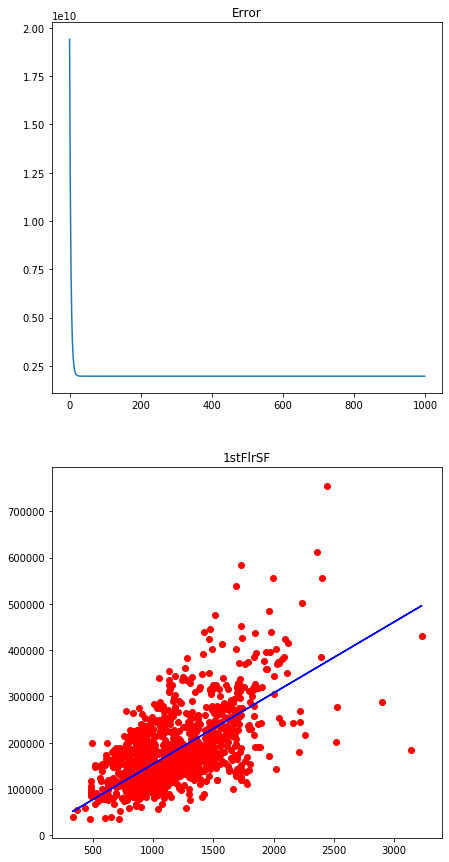

In [294]:

lrx2 = 0.00000009
epochs = 1000

#lrx2 = 0.00000000009
#epochs = 1000          para un error mas grande que S Leanr 

ex2,cx2 = trainprocess (trainx2,trainy,epochs,0,lrx2)

fig, (axx,axx2) = plt.subplots(2,1,figsize=(7,15))

axx.title.set_text('Error')
axx2.title.set_text('1stFlrSF')

GraficaError(ex2,axx)
GraficaEntreno(trainx2,trainy,cx2,1,axx2)

plt.show()

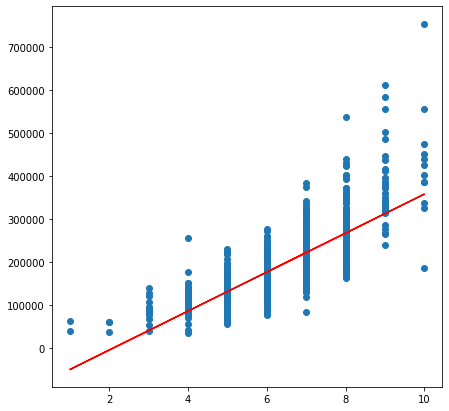

In [273]:
from sklearn.linear_model import LinearRegression
linear_regressorx1 = LinearRegression() 
linear_regressorx1.fit(trainx1.reshape(-1, 1), trainy.reshape(-1, 1))
Y_predx1 = linear_regressorx1.predict(trainx1.reshape(-1, 1)) 
plt.figure(figsize=(7,7))
plt.scatter(trainx1, trainy)
plt.plot(trainx1,Y_predx1, color='red')
plt.show()

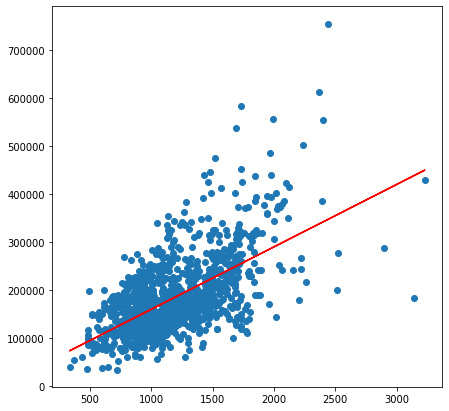

In [272]:
from sklearn.linear_model import LinearRegression
linear_regressorx2 = LinearRegression() 
linear_regressorx2.fit(trainx2.reshape(-1, 1), trainy.reshape(-1, 1))
Y_predx2 = linear_regressorx2.predict(trainx2.reshape(-1, 1)) 
plt.figure(figsize=(7,7))
plt.scatter(trainx2, trainy)
plt.plot(trainx2,Y_predx2, color='red')
plt.show()

In [276]:
#funcion Promedio 
def medianPredction(YhatLearn,x,manual,formato):
    
    
    l = len(formato) 
    
    o  = np.ones(x.shape)
    xh = np.column_stack((x,o))
    m  = manual[len(manual)-1][0]
    b  = manual[len(manual)-1][1]
    Yhatmx1 = np.dot(xh,[m,b])
    
    result= []
    result.append(Yhatmx1.reshape(-1, 1)[:l])
    result.append(YhatLearn[:l])
    result.append(((Yhatmx1.reshape(-1, 1) + YhatLearn) /2)[:l])
    
    return result


rs =  np.arange(2)


#variable 1
result  =  medianPredction(Y_predx1,trainx1,cx1,rs)

print ("PRomedio varialbe x1")
print (" Y Manual")
print (result[0])
print (" Y S learn")
print (result[1])
print (" Y Promedio")
print (result[2])


result  =  medianPredction(Y_predx2,trainx2,cx2,rs)

print (" ")
print ("PRomedio varialbe x2")
print (" Y Manual")
print (result[0])
print (" Y S learn")
print (result[1])
print (" Y Promedio")
print (result[2])


    
    
    

PRomedio varialbe x1
 Y Manual
[[221414.42013537]
 [176002.42135622]]
 Y S learn
[[221414.42013537]
 [176002.42135622]]
 Y Promedio
[[221414.42013537]
 [176002.42135622]]
 
PRomedio varialbe x2
 Y Manual
[[131564.89268355]
 [193965.81887565]]
 Y S learn
[[141562.84857277]
 [194323.05294136]]
 Y Promedio
[[136563.87062816]
 [194144.4359085 ]]


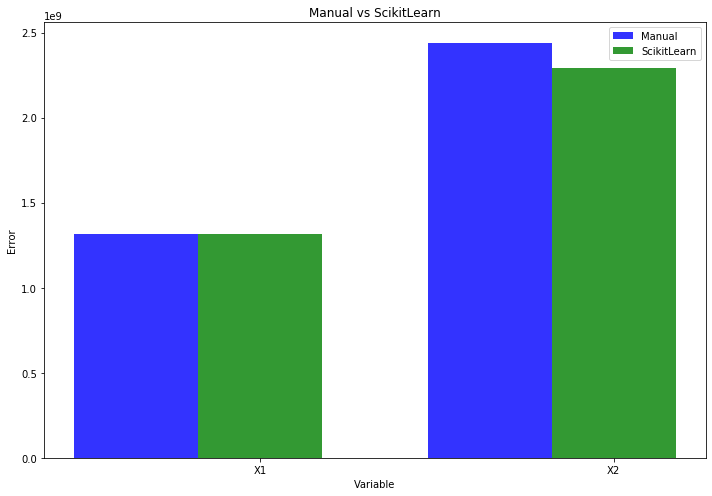

In [278]:
#Modelo 1 comparacion 
#cx1  data tran to grab b & m 

testx1 = test[:,1]
testy  = test[:,0]
testx2 = test[:,2]



#modelo 1
o  = np.ones(testx1.shape)
xh = np.column_stack((testx1,o))
m  = cx1[len(cx1)-1][0]
b  = cx1[len(cx1)-1][1]
Yhatmx1 = np.dot(xh,[m,b])
ex1  = np.mean( (testy-Yhatmx1) **2) /2 #error variable 1 

#modelo Sklearn
Y_pred = linear_regressorx1.predict(testx1.reshape(-1, 1)) 
eslx1  = np.mean( (testy.reshape(-1, 1)-Y_pred) **2) /2 #error variable 1 





#modelo 2 
o  = np.ones(testx2.shape)
xh = np.column_stack((testx2,o))
m  = cx2[len(cx2)-1][0]
b  = cx2[len(cx2)-1][1]
Yhatmx2 = np.dot(xh,[m,b])
ex2  = np.mean( (testy-Yhatmx2) **2) /2 #error variable 1 

#modelo SKlearn
Y_pred = linear_regressorx2.predict(testx2.reshape(-1, 1)) 
eslx2  = np.mean( (testy.reshape(-1, 1)-Y_pred) **2) /2 #error variable 1 



n_groups = 2

objects =  ('x1','x2')
y_pos = np.arange(len(objects))
errorx1 = [ex1,ex2]
errorx2 = [eslx1,eslx2]

fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8


rects1 = plt.bar(index, errorx1, bar_width,
alpha=opacity,
color='b',
label='Manual')

rects2 = plt.bar(index + bar_width, errorx2, bar_width,
alpha=opacity,
color='g',
label='ScikitLearn')


plt.title("Manual vs ScikitLearn")
plt.xlabel('Variable')
plt.ylabel('Error')
plt.xticks(index + bar_width, ('X1', 'X2',))
plt.legend()

plt.tight_layout()
plt.show()








